<a href="https://colab.research.google.com/github/richu-07/project5/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 2: Load the dataset
data = pd.read_csv('/content/bank_transactions_data_2.csv')

In [ ]:
# Step 3: Preprocess the dataset
# Define features and target variable
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Location', 'Channel', 'CustomerOccupation']
target = 'TransactionType'

# Encode categorical features and target variable
label_encoders = {}
for col in ['Location', 'Channel', 'CustomerOccupation', target]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define X (features) and y (target)
X = data[features]
y = data[target]

# Normalize numerical features
scaler = StandardScaler()
X[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']] = \
    scaler.fit_transform(X[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])


<ipython-input-3-8c67b9351519>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']] = \


In [ ]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Create and configure the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Implement EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7111 - loss: 0.7015 - val_accuracy: 0.7773 - val_loss: 0.5570
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.5670 - val_accuracy: 0.7773 - val_loss: 0.5359
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7839 - loss: 0.5260 - val_accuracy: 0.7773 - val_loss: 0.5247
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.5370 - val_accuracy: 0.7773 - val_loss: 0.5200
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7804 - loss: 0.5203 - val_accuracy: 0.7773 - val_loss: 0.5106
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.5199 - val_accuracy: 0.7773 - val_loss: 0.5085
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.5048 - val_accuracy: 0.7773 - val_loss: 0.5097
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7704 - loss: 0.5142 - val_accuracy: 0.7773 - val_loss:

In [ ]:
# Step 7: Evaluate the model
# Predictions on training and testing sets
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy scores
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

# Generate classification report and confusion matrix
classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoders[target].classes_)
conf_matrix = confusion_matrix(y_test, y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
# Step 8: Output the results
print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Training Accuracy: 0.77
Testing Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

      Credit       0.50      0.01      0.02       112
       Debit       0.78      1.00      0.87       391

    accuracy                           0.78       503
   macro avg       0.64      0.50      0.45       503
weighted avg       0.72      0.78      0.68       503


Confusion Matrix:
 [[  1 111]
 [  1 390]]


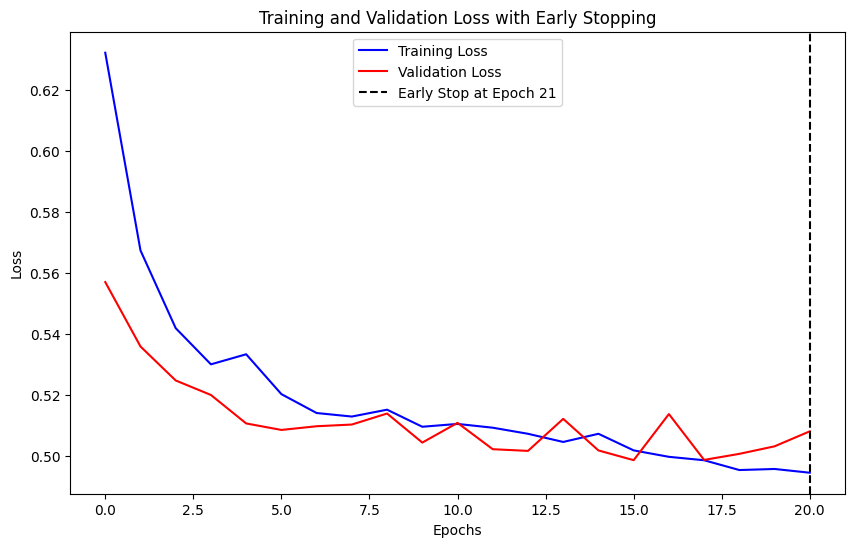

Early stopping occurred at epoch 21


In [ ]:
# Step 9: Plot the training and validation loss
plt.figure(figsize=(10, 6))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

# Mark where early stopping occurred
stop_epoch = len(history.history['loss'])  # Total epochs trained
plt.axvline(x=stop_epoch - 1, color='black', linestyle='--', label=f'Early Stop at Epoch {stop_epoch}')

plt.title('Training and Validation Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Output early stopping details
print(f"Early stopping occurred at epoch {stop_epoch}")
